In [1]:
###### Mnist Digit Recognizer ######

# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

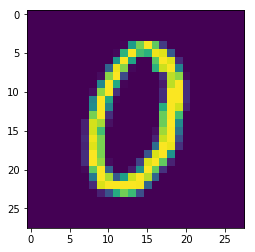

In [2]:
dataset_train = pd.read_csv('train.csv')
x_train1 = dataset_train.iloc[:,1:].values/255.
y_train1 = dataset_train.iloc[:,0:1].values
x_train1 = x_train1.reshape(-1,28,28,1)
plt.imshow(x_train1[5][:,:,0])

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
on =OneHotEncoder(categorical_features=[0])
y_train1 = on.fit_transform(y_train1).toarray()

In [5]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x_train1,y_train1,test_size=.10)

In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# Importing Dataset
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [8]:
train_datagen = ImageDataGenerator(shear_range=0.35,
                                   zoom_range=0.2,
                                   height_shift_range=.1,
                                   rotation_range=10,
                                   width_shift_range=.1)

In [9]:
train_datagen.fit(x_train)

In [10]:
# Importing Libraries to build the CNN using Keras
from keras import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import keras

In [11]:
# importing Keras and required libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

# Building the convolutional neural network

classifier = Sequential()

# Adding the first convolution layer

classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))


# Pooling layer

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the second convolution layer

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
# 2nd Pooling layer

classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(.1))

# adding the flattening layer

classifier.add(Flatten())

# Adding the ANN

classifier.add(Dense(units=300, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=10, activation='softmax'))

# Compiling the ANN

classifier.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.callbacks import ReduceLROnPlateau

In [13]:
reduc_lr = ReduceLROnPlateau(monitor='val_acc',factor=0.2,patience=2,min_lr=0.001)

In [ ]:
classifier.fit_generator(train_datagen.flow(x_train,y_train, batch_size=40),
                              epochs =40, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0]//40,callbacks=[reduc_lr])

Epoch 1/40
610/945 [==================>...........] - ETA: 39s - loss: 0.5132 - acc: 0.8352

In [13]:
testing_data = pd.read_csv('test.csv')
testing_data = testing_data.values/255.0
testing_data = testing_data.reshape(-1,28,28,1)
submission = classifier.predict(testing_data)

# Maximum Probability Index

submission = np.argmax(submission, axis = 1)
submission = pd.Series(submission,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)

submission.to_csv("mnist_pred.csv",index=False)